In [9]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#importing data from kaggle 
titanic_test=pd.read_csv("titanic_test.csv")
titanic_train=pd.read_csv("titanic_train.csv")


In [3]:
#getting the first five rows of testing data
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#getting the first five rows of training data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#getting info of the tainig data
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#getting info of the testing data
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#decribing the  testing data
titanic_test.describe

<bound method NDFrame.describe of      PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903  

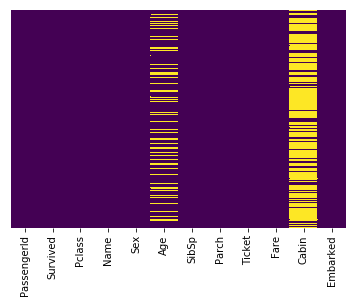

In [11]:
#checking if there is any null values in train data
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [12]:
sns.set_style("whitegrid")

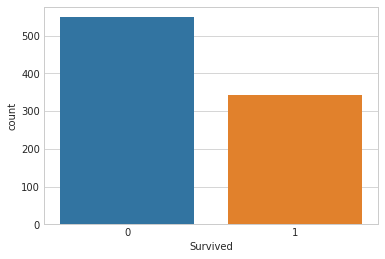

In [15]:
# 550 not survived and 350 survived 
sns.countplot(x="Survived",data=titanic_train)


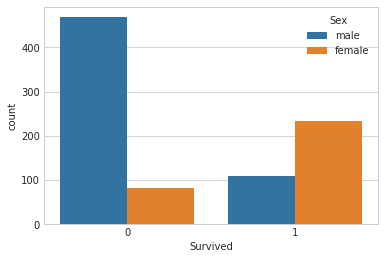

In [19]:
#checking survived by sex
sns.countplot(x="Survived",hue="Sex",data=titanic_train)

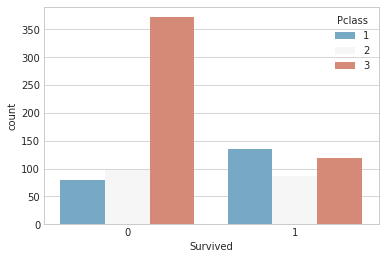

In [20]:
#Checking survived by passanger class
sns.countplot(x="Survived",hue="Pclass",data=titanic_train,palette='RdBu_r')

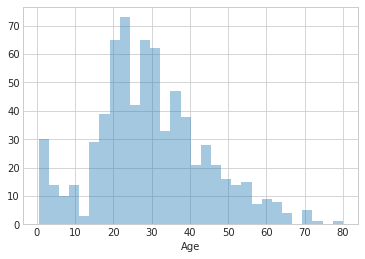

In [24]:
#Getting age of the people 
sns.distplot(titanic_train['Age'].dropna(),kde=False,bins=30)


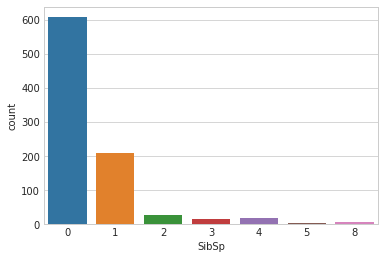

In [27]:
#Checking with another columns 
sns.countplot(x='SibSp',data=titanic_train)

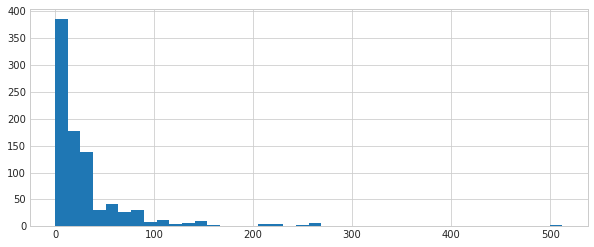

In [31]:
#Getting values from fare columns
titanic_train['Fare'].hist(bins=40,figsize=(10,4))

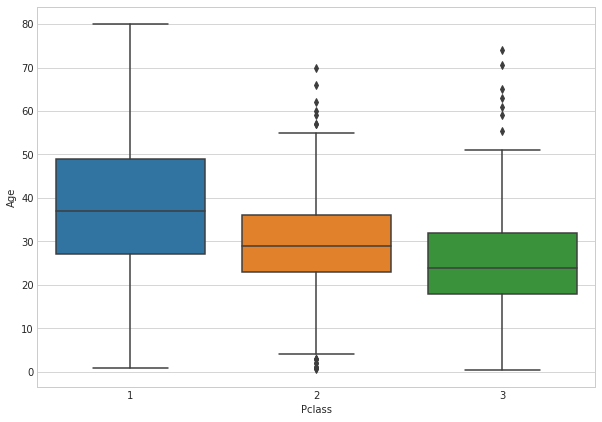

In [41]:
#getting the avg values 
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=titanic_train)


In [42]:
#Data Cleaning
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        
            
    
    

In [45]:
titanic_train['Age']=titanic_train[["Age","Pclass"]].apply(add_age,axis=1)

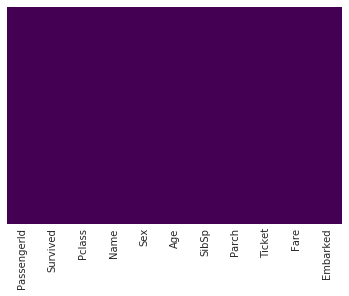

In [54]:
#Filled age columns with avg age 
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")


In [50]:
#drop cabin column 
titanic_train.drop('Cabin',axis=1,inplace=True)

In [51]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [64]:
#Categorical Features
sex= pd.get_dummies(titanic_train['Sex'],drop_first=True)

In [65]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [66]:
embarked=pd.get_dummies(titanic_train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [67]:
#adding new columns 

titanic_train= pd.concat([titanic_train,sex,embarked],axis=1)

In [68]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [72]:
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


ValueError: labels ['Sex' 'Embarked' 'Name' 'Ticket'] not contained in axis

In [73]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
titanic_train.drop('PassengerId',axis=1,inplace=True)


In [75]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [81]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [82]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
#Logistic Regression 
X=titanic_train.drop('Survived',axis=1)
y=titanic_train['Survived']

In [94]:
from sklearn.model_selection import  train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logmodel=LogisticRegression()

In [98]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
predictions=logmodel.predict(X_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 40,  74]])

In [104]:
pclass=pd.get_dummies(titanic_train['Pclass'])


In [105]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [106]:
titanic_train=pd.concat([titanic_train,pclass],axis=1)

In [107]:
titanic_train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [110]:
titanic_train.drop('Pclass',axis=1,inplace=True)

In [111]:
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1


In [112]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [113]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 40,  74]])